# On codera la lecture d'ADN

In [94]:
import plotly.express as px
import random
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [87]:
DEBUT_LECTURE = "ATG"
STOPS = ["TAA", "TAG", "TGA"]

acide_amine = {
    "TTT" : "Phe",
    "TTC" : "Phe",

    "TTA" : "Leu",
    "TTG" : "Leu",
    "CTT" : "Leu",
    "CTC" : "Leu",
    "CTA" : "Leu",
    "CTG" : "Leu",

    "ATT" : "Ile",
    "ATC" : "Ile",
    "ATA" : "Ile",

    "ATG" : "Met",

    "GTT" : "Val",
    "GTC" : "Val",
    "GTA" : "Val",
    "GTG" : "Val",

    "TCT" : "Ser",
    "TCC" : "Ser",
    "TCA" : "Ser",
    "TCG" : "Ser",

    "CCT" : "Pro",
    "CCC" : "Pro",
    "CCG" : "Pro",
    "CCA" : "Pro",

    "ACT" : "Thr",
    "ACA" : "Thr",
    "ACG" : "Thr",
    "ACC" : "Thr",

    "GCT" : "Ala",
    "GCA" : "Ala",
    "GCC" : "Ala",
    "GCG" : "Ala",

    "TAT" : "Tyr",
    "TAC" : "Tyr",

    "CAT" : "His",
    "CAC" : "His",

    "CAA" : "Gln",
    "CAG" : "Gln",

    "AAT" : "Asn",
    "AAC" : "Asn",

    "AAA" : "Lys",
    "AAG" : "Lys",

    "GAT" : "Asp",
    "GAC" : "Asp",

    "GAA" : "Glu",
    "GAG" : "Glu",

    "TGT" : "Cys",
    "TGC" : "Cys",

    "TGG" : "Trp",

    "CGT" : "Arg",
    "CGA" : "Arg",
    "CGC" : "Arg",
    "CGG" : "Arg",
    "AGA" : "Arg",
    "AGG" : "Arg",

    "AGT" : "Ser",
    "AGC" : "Ser",

    "GGT" : "Gly",
    "GGC" : "Gly",
    "GGA" : "Gly",
    "GGG" : "Gly"

}


In [88]:
# Trouver le début de la séquence
def find_start(adn):
    if adn[0:3] == DEBUT_LECTURE:
        return adn[3:]
    return find_start(adn[1:])

# Supprimer les lettres à la fin de l'adn qui ne servent pas au calcul
def delete_end(adn):
    if adn == "":
        return ""
    if adn[0:3] in STOPS:
        return ""
    return adn[0:3] + delete_end(adn[3:])

# ça retourne juste la séquence codante
def get_coding_sequence(adn):
    adn = find_start(adn)
    return delete_end(adn)


# Lire la séquence après avoir enlevé les éléments qu'on lit pas
def read_sequence(adn):
    if len(adn) <= 2 or adn[0:3] in STOPS:
        return ""
    return (acide_amine[adn[0:3]] + "-" + read_sequence(adn[3:]))

def compare_two_sequences(adn1, adn2):
    element1 = read_sequence(adn1)
    element2 = read_sequence(adn2)

    element1 = element1.split("-")
    element2 = element2.split("-")

    min_length = min(len(element1), len(element2))
    equal = 0

    for i in range(0, min_length):
        if element1[i] == element2[i]:
            equal = equal + 1

    return equal


In [95]:
# On lit notre ADN
def read_adn(adn):
    return read_sequence(find_start(adn))

In [90]:
def generate_letter():
    return random.choice(["A", "T", "G", "C"])

def generate_sequence(length=-1):
    if length == -1:
        length = random.choice(range(20, 30))
    s = ""
    for i in range(0, length):
        s = s+generate_letter()
    return s

In [91]:
def changement(arn, PROB_M=5, PROB_D=5, PROB_A=5):
    p = random.choice(range(0, 100))
    if p < PROB_A:
        arn = arn + generate_letter()

    elif p < PROB_A + PROB_M:
        arn = generate_letter()

    elif p < PROB_A + PROB_M + PROB_D:
        arn = ""

    return arn

In [92]:
def sequence_changement(arn, proba_mut, proba_delete, proba_addition):
    t = ""
    for c in arn:
        t += changement(c, proba_mut, proba_delete, proba_addition)
    return t

In [93]:
def comparer_deux_chaines_ADN(ch1, ch2):
    ch_max = ""
    ch_min = ""
    if len(ch1) < len(ch2):
        ch_max = ch2
        ch_min = ch1
    else:
        ch_max = ch1
        ch_min = ch2

    n = len(ch_max) - len(ch_min)
    max_output = 0
    for k in range(0, n+1):
        max_output = max(max_output, int(np.sum([np.char.equal(ch_min, ch_max[k:k+len(ch_min)]) == True])))

    return max_output



In [96]:
CONST_POPULATION = 100
ADN = "ATGTTAGAAATTTCATGGTGCCTTA"

def meilleur_personne(generated_adn, proba_mut=5, proba_delete=5, proba_addition=5):
    result =  []
    g_adn = generated_adn
    print("ADN généré au départ :", generated_adn)
    find = False
    loop = 0
    while not find:
        pop_sequences = [""]*CONST_POPULATION
        occurences = [None]*CONST_POPULATION
        for i in range(0, CONST_POPULATION):
            pop_sequences[i] = sequence_changement(generated_adn, proba_mut, proba_delete, proba_addition)
            occurences[i] = compare_two_sequences(ADN, pop_sequences[i])
        max_index = occurences.index(max(occurences))
        result.append(pop_sequences[max_index])
        generated_adn = pop_sequences[max_index]

        if read_sequence(ADN) == read_sequence(generated_adn):
            find = True
        loop = loop + 1
        if loop > 300:
            find = True

    return g_adn, result, loop




In [98]:
proba_mut = np.arange(3, 7, 1)
proba_del = np.arange(1, 5, 1)
proba_add = np.arange(1, 5, 1)
mutation = list(itertools.product(proba_mut, proba_del, proba_add))


generations = []
# On génére une chaine d'ADN pour tester la convergence avec différents paramètres de Proba
ADN_generated = generate_sequence()

for mut in mutation:
    print("proba_mut =", mut[0], ", proba_delete =", mut[1], " proba_add =", mut[2])
    ADN_depart, result, nb_generation = meilleur_personne(ADN_generated, proba_mut = mut[0], proba_delete = mut[1], proba_addition = mut[2])
    print("Nombre de générations :", nb_generation)
    generations.append(nb_generation)



generations = np.array(generations)

proba_mut = 3 , proba_delete = 1  proba_add = 1
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 86
proba_mut = 3 , proba_delete = 1  proba_add = 2
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 184
proba_mut = 3 , proba_delete = 1  proba_add = 3
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 113
proba_mut = 3 , proba_delete = 1  proba_add = 4
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 286
proba_mut = 3 , proba_delete = 2  proba_add = 1
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 105
proba_mut = 3 , proba_delete = 2  proba_add = 2
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 273
proba_mut = 3 , proba_delete = 2  proba_add = 3
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 188
proba_mut = 3 , proba_delete = 2  proba_add = 4
ADN généré au départ : GATTCCGAGAGACCGCCGATCCCT
Nombre de générations : 301
proba_mut

In [99]:
df = pd.DataFrame({
    'Mutation' : [m[0] for m in mutation],
    'Supression' : [m[1] for m in mutation],
    'Addition' : [m[2] for m in mutation],
    'Nb de générations' : [g for g in generations]
})

In [100]:
fig = px.scatter_3d(df, x='Mutation', y='Supression', z='Addition', color='Nb de générations', title="Nombre de générations en fonction des proba")
fig.update_layout(
    autosize=False,
    width=1200,   # Adjust as needed (e.g., 1000-1600 for wide subplots)
    height=1000   # Adjust for your 5x4 grid (e.g., square or taller)
)
fig.show()


In [101]:
data = pd.read_csv("nb_gen.csv")

In [102]:
fig = px.scatter_3d(data, x='Mutation', y='Supression', z='Addition', color='Nb de générations', title="Nombre de générations en fonction des proba")
fig.update_layout(
    autosize=False,
    width=1200,   # Adjust as needed (e.g., 1000-1600 for wide subplots)
    height=1000   # Adjust for your 5x4 grid (e.g., square or taller)
)
fig.show()

In [105]:
Y, Z = np.meshgrid(np.linspace(1, 3, 20), np.linspace(1, 2, 20), indexing='ij')
fig = make_subplots(rows=5, cols=4,
                    specs=[[{'type': 'surface'} for j in range(4)] for i in range(5)],
                    subplot_titles=data["Mutation"].unique().astype(str)
                    )

for i in range(5):
  for j in range(4):
    new_df = data.iloc[(i*4+j)*400 : (i*4+j+1)*400]
    T = np.array(new_df["Nb de générations"]).reshape(Y.shape)
    m = np.array(new_df["Mutation"])
    m = m[0]
    fig.add_trace(
      go.Surface(x=Y, y=Z, z=T, showscale=False), i+1, j+1)

fig.update_layout(
    width=2000,    # Wide for 4 cols
    height=1600,   # Tall for 5 rows
    margin=dict(t=100, b=20, l=20, r=20),  # Room for titles
    title="3D surfaces en fonction de proba de Mutation"  # Optional overall title
)
fig.update_scenes(
    xaxis_title="supp", yaxis_title="add", zaxis_title="gen",
    aspectmode="cube"  # Or "data" for better scaling
)
fig.show()


In [ ]:
def moran_v1(generated_adn, proba_mut=5, proba_delete=5, proba_addition=5):
    alphas = range(50, 100)
    print("ADN généré au départ :", generated_adn)
    generations = []
    for alpha in alphas:
        Poids=np.exp(-alpha*np.arange(CONST_POPULATION, 0, -1))
        Probas=Poids/np.sum(Poids)
        result =  []
        g_adn = generated_adn
        find = False
        loop = 0
        pop_sequences = [""]*CONST_POPULATION
        occurences = [None]*CONST_POPULATION

        while not find:
            for i in range(0, CONST_POPULATION):
                if pop_sequences[i] == "":
                    pop_sequences[i] = sequence_changement(generated_adn, proba_mut, proba_delete, proba_addition)
                else:
                    pop_sequences[i] = sequence_changement(pop_sequences[i], proba_mut, proba_delete, proba_addition)

                occurences[i] = compare_two_sequences(ADN, pop_sequences[i])

            population_triee = [val for _, val in sorted(zip(occurences, pop_sequences))]
            result.append(population_triee[-1])

            if read_sequence(population_triee[-1]) == read_sequence(ADN):
                find = True
            loop = loop + 1

            pop_sequences = random.choices(population_triee, weights=Probas, k=CONST_POPULATION)


        generations.append(loop)

    return alphas, generations



In [ ]:
output = []

for i in range(20):
  alphas, nb_gen = moran_v1(ADN_generated)
  output.append(nb_gen)

output = np.array(output)

real_output = output.mean(axis=0)

ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGAAGCCAGTACGATCATCGAA
ADN généré au départ : ACTAATGA

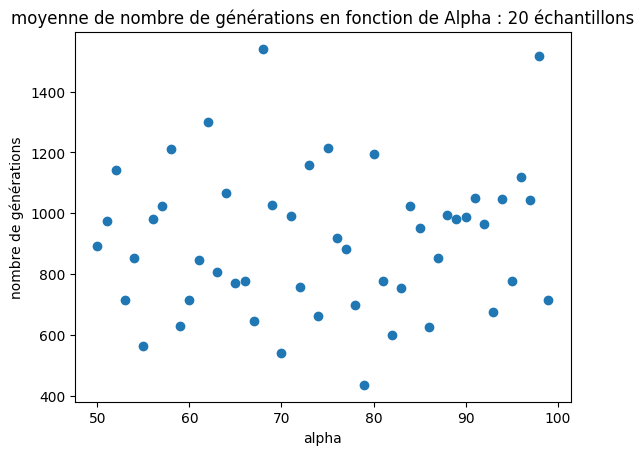

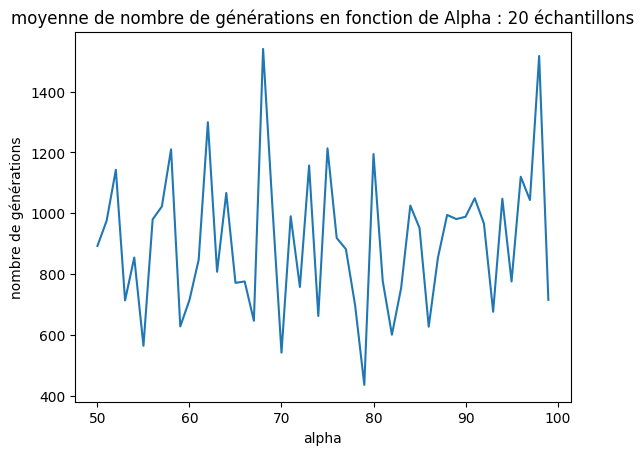

In [ ]:
plt.scatter(alphas, real_output)
plt.xlabel("alpha")
plt.ylabel("nombre de générations")
plt.title("moyenne de nombre de générations en fonction de Alpha : 20 échantillons")
plt.show()

plt.plot(alphas, real_output)
plt.xlabel("alpha")
plt.ylabel("nombre de générations")
plt.title("moyenne de nombre de générations en fonction de Alpha : 20 échantillons")
plt.show()